In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 55: Advanced Meter Topics

## Objects for Organizing Hierarchical Partitions

Hierarchical metrical structures can be described as a type of fractional, space-preserving tree structure. With such a structure we partition and divide a single duration into one or more parts, where each part is a fraction of the whole. Each part can, in turn, be similarly divided. The objects for configuring this structure are the MeterTerminal and the MeterSequence objects.

MeterTerminal and the MeterSequence objects are for advanced configuration. For basic data access about common meters, see the discussion of TimeSignature, below. 

## Creating and Editing MeterTerminal Objects

A MeterTerminal is a node of the metrical tree structure, defined as a duration expressed as a fraction of a whole note. Thus, 1/4 is 1 quarter length (QL) duration; 3/8 is 1.5 QL; 3/16 is 0.75 QL. For this model, denominators are limited to *n* = 2 :superscript:`x`, for *x* between 1 and 7 (e.g. 1/1 to 1/128).

MeterTerminals can additionally store a weight, or a numerical value that can be interpreted in a variety of different ways.

The following examples in the Python interpreter demonstrate creating a MeterTerminal and accessing the :meth:`numerator <music21.meter.MeterTerminal.numerator>` and :meth:`denominator <music21.meter.MeterTerminal.denominator>` attributes. The  :meth:`duration <music21.meter.MeterTerminal.duration>` attribute stores a :class:`~music21.duration.Duration` object.

In [2]:
from music21 import *
mt = meter.MeterTerminal('3/4')
mt

<MeterTerminal 3/4>

In [3]:
mt.numerator, mt.denominator

(3, 4)

In [4]:
mt.duration.quarterLength

3.0

A MeterTerminal can be broken into an ordered sequence of MeterTerminal objects that sum to the same duration. This new object, to be discussed below, is the MeterSequence. A MeterTerminal can be broken into these duration-preserving components with the :meth:`~music21.meter.MeterTerminal.subdivide` method. An argument for subdivision can be given as a desired number of equal-valued components, a list of numerators assuming equal-denominators, or a list of string fraction representations. 


In [5]:
mt.subdivide(3)

<MeterSequence {1/4+1/4+1/4}>

In [6]:
 mt.subdivide([3,3]) 

<MeterSequence {3/8+3/8}>

In [7]:
mt.subdivide(['1/4','4/8']) 

<MeterSequence {1/4+4/8}>

## Creating and Editing MeterSequence Objects

A MeterSequence object is a sub-class of a MeterTerminal. Like a MeterTerminal, a MeterSequence has a :meth:`numerator <music21.meter.MeterSequence.numerator>`, a :meth:`denominator <music21.meter.MeterSequence.denominator>`, and a :meth:`duration <music21.meter.MeterTerminal.duration>` attribute. A MeterSequence, however, can be a hierarchical tree or sub-tree, containing an ordered sequence of MeterTerminal and/or MeterSequence objects.

The ordered collection of MeterTerminal and/or MeterSequence objects can be accessed like Python lists. MeterSequence objects, like MeterTerminal objects, store a weight that by default is the sum of constituent weights. 

The :meth:`~music21.meter.MeterSequence.partition` and :meth:`~music21.meter.MeterTerminal.subdivide` methods can be used to configure the nested hierarchical structure. 

The :meth:`~music21.meter.MeterSequence.partition` method replaces existing MeterTerminal or MeterSequence objects in place with a new arrangement, specified as a desired number of equal-valued components, a list of numerators assuming equal-denominators, or a list of string fraction representations. 

The :meth:`~music21.meter.MeterTerminal.subdivide` method returns a new MeterSequence (leaving the source MeterSequence unchanged) with an arrangement of MeterTerminals as specified by an argument in the same form as for the :meth:`~music21.meter.MeterSequence.partition` method.

Note that MeterTerminal objects cannot be partitioned in place. A common way to convert a MeterTerminal into a MeterSequence is to reassign the returned MeterSequence from the :meth:`~music21.meter.MeterTerminal.subdivide` method to the position occupied by the MeterTerminal.

The following example creates and partitions a MeterSequence by re-assigning subdivisions to MeterTerminal objects. The use of Python list-like index access is also demonstrated. 


In [8]:
ms = meter.MeterSequence('3/4')
ms

<MeterSequence {3/4}>

In [9]:
ms.partition([3,3]) 
ms

<MeterSequence {3/8+3/8}>

In [10]:
ms[0] 

<MeterTerminal 3/8>

In [11]:
ms[0] = ms[0].subdivide([3,3])
ms[0]

<MeterSequence {3/16+3/16}>

In [12]:
ms

<MeterSequence {{3/16+3/16}+3/8}>

In [13]:
ms[1] = ms[1].subdivide([1,1,1]) 
ms[1][0]

<MeterTerminal 1/8>

In [14]:
ms[1]

<MeterSequence {1/8+1/8+1/8}>

In [15]:
ms

<MeterSequence {{3/16+3/16}+{1/8+1/8+1/8}}>

The resulting structure can be graphically displayed with the following diagram:

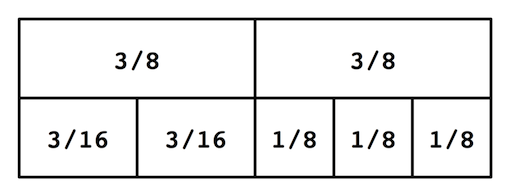

In [16]:
# 3/8 divisions
from IPython.display import Image #_DOCS_HIDE 
Image(filename='images/usersGuide/advancedMeter-02.png') #_DOCS_HIDE 

Numerous MeterSequence attributes provide convenient ways to access information about, or new objects from, the nested tree structure. The :meth:`depth <music21.meter.MeterSequence.depth>` attribute returns the depth count at any node within the tree structure; the :meth:`flat <music21.meter.MeterSequence.flat>` property returns a new, flat MeterSequence constructed from all the lowest-level MeterTerminal objects (all leaf nodes). 


In [17]:
ms.depth

2

In [18]:
ms[0].depth

1

In [19]:
ms.flat

<MeterSequence {3/16+3/16+1/8+1/8+1/8}>

Numerous methods provide ways to access levels (slices) of the hierarchical structure, or all nodes found at a desired hierarchical level. As all components preserve the duration of their container, all levels have the same total duration. The :meth:`~music21.meter.MeterSequence.getLevel` method returns, for a given depth, a new, flat MeterSequence. The :meth:`~music21.meter.MeterSequence.getLevelSpan` method returns, for a given depth, the time span of each node as a list of start and end values. 

In [20]:
ms.getLevel(0)

<MeterSequence {3/8+3/8}>

In [21]:
ms.getLevel(1)

<MeterSequence {3/16+3/16+1/8+1/8+1/8}>

In [22]:
ms.getLevelSpan(1)

[(0.0, 0.75), (0.75, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0)]

In [23]:
ms[1].getLevelSpan(1)

[(0.0, 0.5), (0.5, 1.0), (1.0, 1.5)]

Finally, numerous methods provide ways to find and access the 
relevant nodes (the MeterTerminal or MeterSequence objects) active 
given a quarter length position into the tree structure. 
The :meth:`~music21.meter.MeterSequence.offsetToIndex` method returns, 
for a given QL, the index of the active node. 
The :meth:`~music21.meter.MeterSequence.offsetToSpan` method returns, 
for a given QL, the span of the active node. 
The :meth:`~music21.meter.MeterSequence.offsetToDepth` method returns, 
for a given QL, the maximum depth at this position. 

In [24]:
ms.offsetToIndex(2.5)

1

In [25]:
ms.offsetToSpan(2.5)

(1.5, 3.0)

In [26]:
ms.offsetToDepth(.5)

2

In [27]:
 ms[0].offsetToDepth(.5)

1

In [28]:
 ms.getLevel(1).offsetToSpan(.5)

(0, 0.75)

## Advanced Time Signature Configuration

The music21 :class:`~music21.meter.TimeSignature` object contains four parallel MeterSequence objects, each assigned to the attributes :meth:`displaySequence <music21.meter.TimeSignature.displaySequence>`, :meth:`beatSequence <music21.meter.TimeSignature.beatSequence>`, :meth:`beamSequence <music21.meter.TimeSignature.beamSequence>`, :meth:`accentSequence <music21.meter.TimeSignature.accentSequence>`. The following displays a graphical realization of these four MeterSequence objects. 

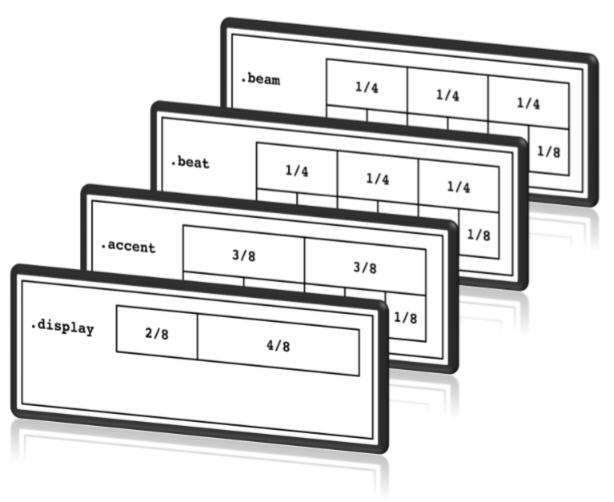

In [29]:
# four MeterSequence objects
Image(filename='images/usersGuide/overviewMeters-01.png', width=500) #_DOCS_HIDE

The TimeSignature provides a model of all common hierarchical structures contained within a bar. Common meters are initialized with expected defaults; however, full MeterSequence customization is available.


## Configuring Display

The TimeSignature :meth:`displaySequence <music21.meter.TimeSignature.displaySequence>` MeterSequence employs the highest-level partitions to configure the displayed time signature symbol. If more than one partition is given, those partitions will be interpreted as additive meter components. If partitions have a common denominator, a summed numerator (over a single denominator) can be displayed by setting the TimeSignature :meth:`summedNumerator <music21.meter.TimeSignature.summedNumerator>` attribute to True. Lower-level subdivisions of the TimeSignature MeterSequence are not employed.

Note that a new MeterSequence instance can be assigned to the :meth:`displaySequence <music21.meter.TimeSignature.displaySequence>` attribute with a duration and/or partitioning completely independent from the :meth:`beatSequence <music21.meter.TimeSignature.beatSequence>`, :meth:`beamSequence <music21.meter.TimeSignature.beamSequence>`, and :meth:`accentSequence <music21.meter.TimeSignature.accentSequence>` MeterSequences.

The following example demonstrates setting the display MeterSequence for a TimeSignature.  NOTE that there is currently a bug in the first one that is showing 5/16 instead of 5/8. We hope to fix this soon.

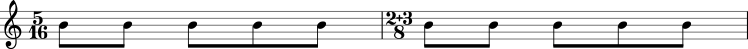

In [30]:
from music21 import stream, note
ts1 = meter.TimeSignature('5/8') # assumes two partitions
ts1.displaySequence.partition(['3/16', '1/8', '5/16'])
ts2 = meter.TimeSignature('5/8') # assumes two partitions
ts2.displaySequence.partition(['2/8', '3/8'])
ts2.summedNumerator = True
s = stream.Stream()
for ts in [ts1, ts2]:
    m = stream.Measure()
    m.timeSignature = ts
    n = note.Note('b')
    n.quarterLength = 0.5
    m.repeatAppend(n, 5)
    s.append(m)

s.show()  


## Configuring Beam

The TimeSignature :meth:`beamSequence <music21.meter.TimeSignature.beamSequence>` MeterSequence employs the complete hierarchical structure to configure the single or multi-level beaming of a bar. The outer-most partitions can specify one or more top-level partitions. Lower-level partitions subdivide beam-groups, providing the appropriate beam-breaks when sufficiently small durations are employed. 

The :meth:`beamSequence <music21.meter.TimeSignature.beamSequence>` MeterSequence is generally used to create and configure :class:`~music21.note.Beams` objects stored in :class:`~music21.note.Note` objects. The TimeSignature :meth:`~music21.meter.TimeSignature.getBeams` method, given a list of :class:`~music21.duration.Duration` objects, returns a list of :class:`~music21.note.Beams` objects based on the TimeSignature  :meth:`beamSequence <music21.meter.TimeSignature.beamSequence>` MeterSequence.

Many users may find the Stream :meth:`~music21.stream.Stream.makeBeams` method the most convenient way to apply beams to a Measure or Stream of Note objects. This method returns a new Stream with created and configured Beams. 

The following example beams a bar of 3/4 in four different ways. The diversity and complexity of beaming is offered here to illustrate the flexibility of this model.


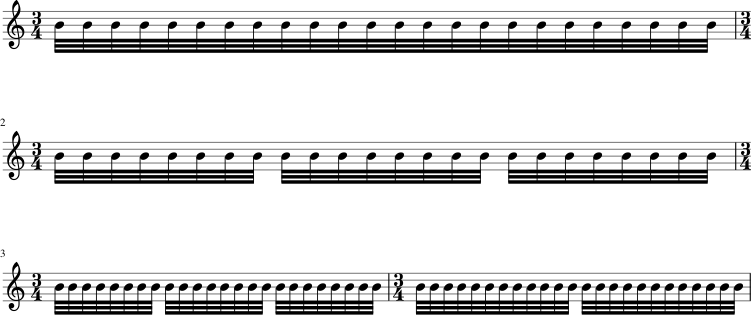

In [32]:
ts1 = meter.TimeSignature('3/4')
ts1.beamSequence.partition(1)
ts1.beamSequence[0] = ts1.beamSequence[0].subdivide(['3/8', '5/32', '4/32', '3/32'])

ts2 = meter.TimeSignature('3/4')
ts2.beamSequence.partition(3)

ts3 = meter.TimeSignature('3/4')
ts3.beamSequence.partition(3)

for i in range(len(ts3.beamSequence)):
    ts3.beamSequence[i] = ts3.beamSequence[i].subdivide(2)

ts4 = meter.TimeSignature('3/4')
ts4.beamSequence.partition(['3/8', '3/8'])
for i in range(len(ts4.beamSequence)):
    ts4.beamSequence[i] = ts4.beamSequence[i].subdivide(['6/32', '6/32'])
    for j in range(len(ts4.beamSequence[i])):
        ts4.beamSequence[i][j] = ts4.beamSequence[i][j].subdivide(2)

s = stream.Stream()
for ts in [ts1, ts2, ts3, ts4]:
    m = stream.Measure()
    m.timeSignature = ts
    n = note.Note('b')
    n.quarterLength = 0.125
    m.repeatAppend(n, 24)
    s.append(m.makeBeams())

s.show()   

The following is a fractional grid representation of the four beam partitions created.

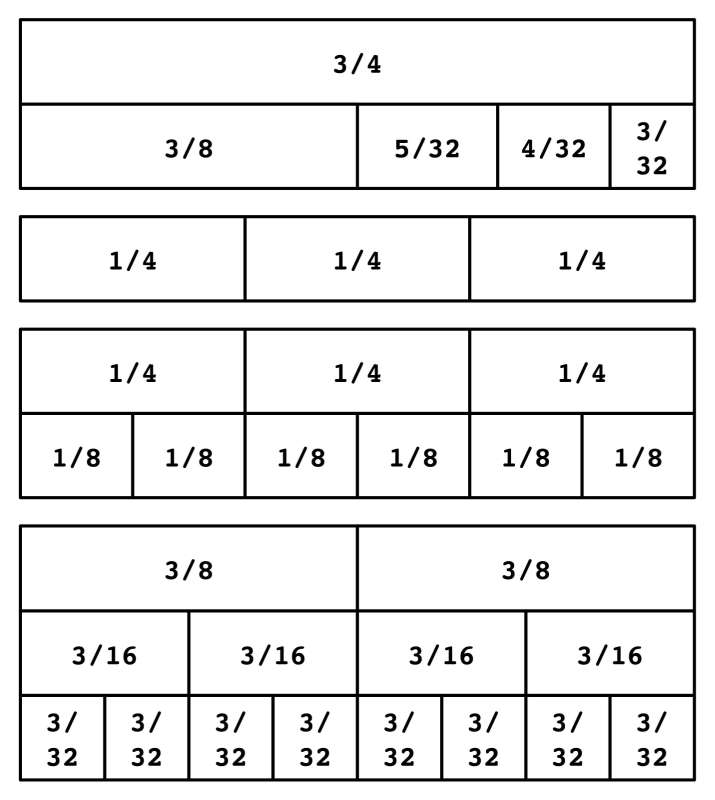

In [33]:
# four beam partitions
Image(filename='images/usersGuide/overviewMeters-03.jpg') #_DOCS_HIDE

## Configuring Beat

The TimeSignature :meth:`beatSequence <music21.meter.TimeSignature.beatSequence>` MeterSequence employs the hierarchical structure to define the beats and beat divisions of a bar. The outer-most partitions can specify one ore more top level beats. Inner partitions can specify the beat division partitions. For most common meters, beats and beat divisions are pre-configured by default.

In the following example, a simple and a compound meter is created, and the default beat partitions are examined. The :meth:`~music21.meter.MeterSequence.getLevel` method can be used to show the beat and background beat partitions. The timeSignature :meth:`beatDuration <music21.meter.TimeSignature.beatDuration>`,  :meth:`beat <music21.meter.TimeSignature.beat>`, and :meth:`beatCountName <music21.meter.TimeSignature.beatCountName>` properties can be used to return commonly needed beat information. The TimeSignature :meth:`beatDivisionCount <music21.meter.TimeSignature.beatDivisionCount>`, and :meth:`beatDivisionCountName <music21.meter.TimeSignature.beatDivisionCountName>` properties can be used to return commonly needed beat division information. These descriptors can be combined to return a string representation of the TimeSignature classification with :meth:`classification <music21.meter.TimeSignature.classification>` property.


In [34]:
ts = meter.TimeSignature('3/4')
ts.beatSequence.getLevel(0)

<MeterSequence {1/4+1/4+1/4}>

In [35]:
ts.beatSequence.getLevel(1)

<MeterSequence {1/8+1/8+1/8+1/8+1/8+1/8}>

In [36]:
ts.beatDuration

<music21.duration.Duration 1.0>

In [37]:
ts.beatCount

3

In [38]:
ts.beatCountName

'Triple'

In [39]:
ts.beatDivisionCount

2

In [40]:
ts.beatDivisionCountName

'Simple'

In [41]:
ts.classification

'Simple Triple'

In [42]:
ts = meter.TimeSignature('12/16')
ts.beatSequence.getLevel(0)

<MeterSequence {3/16+3/16+3/16+3/16}>

In [43]:
ts.beatSequence.getLevel(1)

<MeterSequence {1/16+1/16+1/16+1/16+1/16+1/16+1/16+1/16+1/16+1/16+1/16+1/16}>

In [44]:
ts.beatDuration

<music21.duration.Duration 0.75>

In [45]:
ts.beatCount

4

In [46]:
ts.beatCountName

'Quadruple'

In [47]:
ts.beatDivisionCount

3

In [48]:
ts.beatDivisionCountName

'Compound'

In [49]:
ts.classification

'Compound Quadruple'

## Annotating Found Notes with Beat Count

The :meth:`~music21.meter.TimeSignature.getBeat` method returns the currently active beat given a quarter length position into the TimeSignature.

In the following example, all leading tones, or C#s, are collected into a new Stream and displayed with annotations for part, measure, and beat.

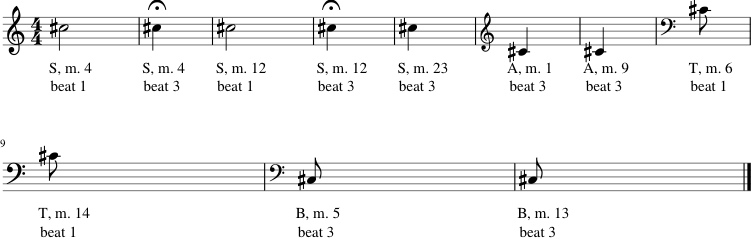

In [50]:
from music21 import corpus
score = corpus.parse('bach/bwv366.xml')
ts = score.flat.getElementsByClass('TimeSignature')[0]
ts.beatSequence.partition(3)

found = stream.Stream()
offsetQL = 0
for part in score.parts:
    found.insert(offsetQL, part.flat.getElementsByClass('Clef')[0])
    for i in range(len(part.getElementsByClass('Measure'))):
        m = part.getElementsByClass('Measure')[i]
        for n in m.notesAndRests:
            if n.name == 'C#':
                n.addLyric('%s, m. %s' % (part.id[0], m.number))
                n.addLyric('beat %s' % ts.getBeat(n.offset))
                found.insert(offsetQL, n)
                offsetQL += 4

found.show()

## Using Beat Depth to Provide Metrical Analysis

Another application of the :meth:`beatSequence <music21.meter.TimeSignature.beatSequence>` MeterSequence is to define the hierarchical depth active for a given note found within the TimeSignature. 

The :meth:`~music21.meter.TimeSignature.getBeatDepth` method, when set with the optional parameter `align` to "quantize", shows the number of hierarchical levels that start at or before that point. This value is described by Lerdahl and Jackendoff as metrical analysis.

In the following example, :meth:`beatSequence <music21.meter.TimeSignature.beatSequence>` MeterSequence is partitioned first into one subdivision, and then each subsequent subdivision into two, down to four layers of partitioning. 

The number of hierarchical levels, found with the :meth:`~music21.meter.TimeSignature.getBeatDepth` method, is appended to each note with the :meth:`~music21.note.GeneralNote.addLyric` method.

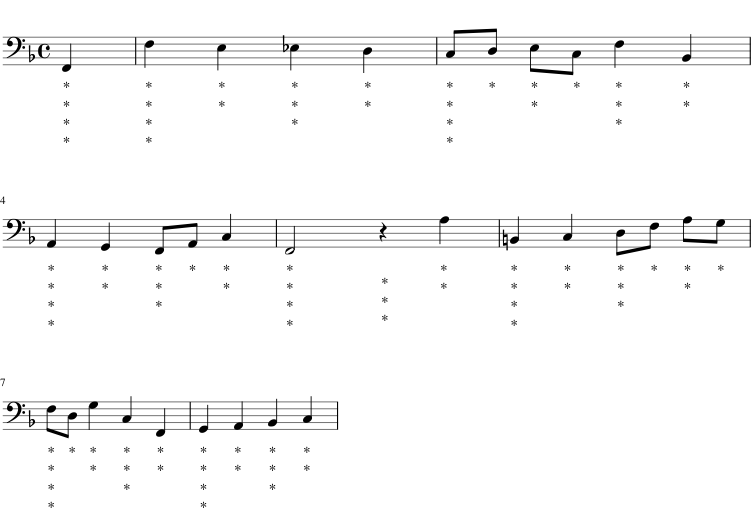

In [51]:
score = corpus.parse('bach/bwv281.xml')
partBass = score.getElementById('Bass')
ts = partBass.flat.getElementsByClass('TimeSignature')[0]
ts.beatSequence.partition(1)
for h in range(len(ts.beatSequence)):
    ts.beatSequence[h] = ts.beatSequence[h].subdivide(2)
    for i in range(len(ts.beatSequence[h])):
        ts.beatSequence[h][i] = ts.beatSequence[h][i].subdivide(2)
        for j in range(len(ts.beatSequence[h][i])):
            ts.beatSequence[h][i][j] = ts.beatSequence[h][i][j].subdivide(2)

for m in partBass.getElementsByClass('Measure'):
    for n in m.notesAndRests:
        for i in range(ts.getBeatDepth(n.offset)):
            n.addLyric('*')

partBass.measures(0, 7).show()  

Alternatively, this type of annotation can be applied to a Stream using the :func:`~music21.analysis.metrical.labelBeatDepth` function.

## Configuring Accent

The TimeSignature :meth:`accentSequence <music21.meter.TimeSignature.accentSequence>` MeterSequence defines one or more levels of hierarchical accent levels, where quantitative accent value is encoded in MeterTerminal or MeterSequence with a number assigned to the :meth:`weight <music21.meter.MeterTerminal.weight>` attribute.


## Applying Articulations Based on Accent

The :meth:`~music21.meter.TimeSignature.getAccentWeight` method returns the currently active accent weight given a quarter length position into the TimeSignature. Combined with the :meth:`~music21.meter.TimeSignature.getBeatProgress` method, Notes that start on particular beat can be isolated and examined. 

The following example extracts the Bass line of a Bach chorale in 3/4 and, after repartitioning the beat and accent attributes, applies accents to reflect a meter of 6/8.


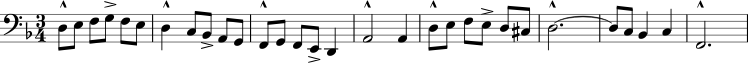

In [52]:
score = corpus.parse('bach/bwv366.xml')
partBass = score.getElementById('Bass')
ts = partBass.flat.getElementsByClass(meter.TimeSignature)[0]
ts.beatSequence.partition(['3/8', '3/8'])
ts.accentSequence.partition(['3/8', '3/8'])
ts.setAccentWeight([1, .5])
for m in partBass.getElementsByClass('Measure'):
    lastBeat = None
    for n in m.notesAndRests:
        beat, progress = ts.getBeatProgress(n.offset)
        if beat != lastBeat and progress == 0:
            if n.tie != None and n.tie.type == 'stop':
                continue
            if ts.getAccentWeight(n.offset) == 1:
                mark = articulations.StrongAccent()
            elif ts.getAccentWeight(n.offset) == .5:
                mark = articulations.Accent()
            n.articulations.append(mark)
            lastBeat = beat
        m = m.sorted
        
partBass.measures(0, 8).show() 